The alg used in task B is KNN.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
trainpath='./dataset/taskb/' 
testpath='./test/taskb/'

transform = transforms.Compose([transforms.Resize((128,128)), #set transfrom type: 128x128 resolution, grayscale image
transforms.Grayscale(num_output_channels=1)])
traindata = datasets.ImageFolder(trainpath, transform) #load the data and the transformation type
testdata = datasets.ImageFolder(testpath, transform)
imagedata = []
imagelabel = []

for image,label in traindata: #change image data from PIL to array

    imagenp = np.array(image, dtype=np.float64)
    imagenp = imagenp.flatten().tolist()
    imagedata.append(imagenp)#add each image list to a big list
    imagelabel.append(label)

imagetest=[]
imagetestlabel=[]

for image,label in testdata:
    
    imagenp = np.array(image, dtype=np.float64)
    imagenp = imagenp.flatten().tolist()
    imagetest.append(imagenp)
    imagetestlabel.append(label)

In [3]:
imagedata = np.array(imagedata) #transform data to numpy array
imagelabel = np.array(imagelabel)
imagetest = np.array(imagetest)
imagetestlabel = np.array(imagetestlabel)

x_train, x_test, y_train, y_test = train_test_split(imagedata, imagelabel, test_size=0.3,random_state=1)

In [4]:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
score_list=[accuracy_score(y_test,y_pred)]

for i in range(2,16): #for a range value of k.
   knn = KNeighborsClassifier(n_neighbors=i)
   knn.fit(x_train,y_train)
   pred_i = knn.predict(x_test)
   count = accuracy_score(y_test,pred_i)
   if count > max(score_list):
      y_pred = pred_i
      n=i
   score_list.append(count)

In [5]:
target_names = ['glioma', 'meningioma','no','pituitary']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      glioma       0.83      0.92      0.87       265
  meningioma       0.92      0.80      0.86       258
          no       0.82      0.75      0.79       126
   pituitary       0.93      0.98      0.95       251

    accuracy                           0.88       900
   macro avg       0.87      0.86      0.87       900
weighted avg       0.88      0.88      0.88       900



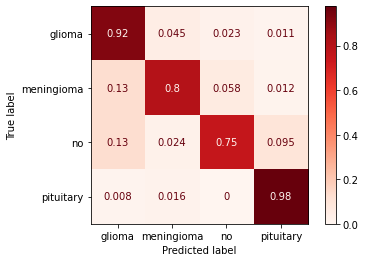

In [6]:
conf = confusion_matrix(y_test, y_pred, normalize='true')
dis = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['glioma', 'meningioma','no','pituitary'])
dis = dis.plot(cmap=plt.cm.Reds)
plt.show()

In [7]:
error = mean_squared_error(y_test,y_pred)
print('Mean squared error is:'+str(error))

Mean squared error is:0.26222222222222225


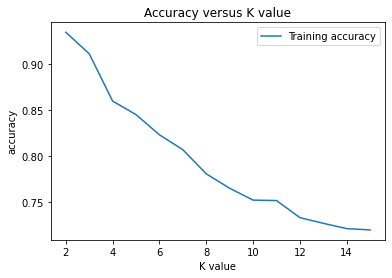

max accuracy is 0.9342857142857143


In [8]:
neighbors = np.arange(2, 16)
accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors): #for a range value of k
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    
    accuracy[i] = knn.score(x_train, y_train)
    n = max(accuracy)


plt.title('Accuracy versus K value')
plt.plot(neighbors, accuracy, label = 'Training accuracy')
plt.xlabel('K value')
plt.ylabel('accuracy')
plt.legend()
plt.show()
n = max(accuracy)
print("max accuracy is "+str(n))

Test dataset

In [9]:
y_pred1 = kn.predict(imagetest)
targetnames = ['glioma', 'meningioma','no','pituitary']
print(classification_report(imagetestlabel, y_pred1, target_names=targetnames))

              precision    recall  f1-score   support

      glioma       0.79      0.88      0.84        43
  meningioma       0.90      0.81      0.85        68
          no       0.91      0.84      0.87        37
   pituitary       0.86      0.94      0.90        52

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.86      0.86       200



In [10]:
error = mean_squared_error(imagetestlabel,y_pred1)
print('Mean squared error is:'+str(error))

Mean squared error is:0.38


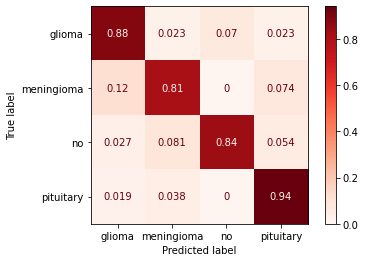

In [11]:
conf = confusion_matrix(imagetestlabel, y_pred1, normalize='true')
dis = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['glioma', 'meningioma','no','pituitary'])
dis = dis.plot(cmap=plt.cm.Reds)
plt.show()